In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
import os
import random
import cv2
os.listdir()

['.ipynb_checkpoints',
 'dogscats',
 'keras_lesson1.ipynb',
 'lesson1.ipynb',
 'Untitled.ipynb']

In [3]:
os.listdir('dogscats')

['models', 'sample', 'test1', 'tmp', 'train', 'valid']

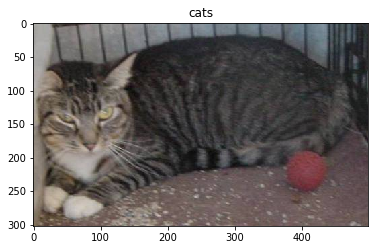

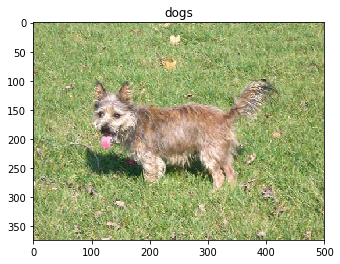

In [6]:
train_dir = "dogscats/valid"
one_from_each = []
titles = []
classes = os.listdir(train_dir)
n_classes = len(classes)
for x in classes:
    unique_img_dir = train_dir + '/' + x
    temp_directory = os.listdir(unique_img_dir)
    temp_img = unique_img_dir + '/' + temp_directory[random.randint(1,10)]
    image = cv2.imread(temp_img)
    image = np.array(image)
    image = image.astype('float32')/255.0
    one_from_each.append(image)
    titles.append(x)
for i in range(2):
    imageshow = one_from_each[i]
    plt.imshow(imageshow[:,:,::-1])
    plt.title(titles[i])
    plt.show()

In [7]:
print(classes)
labels_dict = {0:classes[0],
               1:classes[1]
              }

['cats', 'dogs']


In [8]:
def load_data(directory):
    size = 150,150
    images = []
    labels = []
    for folder in os.listdir(directory):
        print("Loading images from : ",folder, ": ", end="")
        for file in os.listdir(directory + "/" + folder):
            img_path = directory + "/" + folder + "/" + file
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            images.append(curr_img)
            if folder == labels_dict[0]:
                current_label = 0
            else:
                current_label=1
            labels.append(current_label)
        print("completed")
    images, labels = shuffle(images, labels)
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = np.array(labels)
    labels = keras.utils.to_categorical(labels, n_classes)
    return images, labels

In [9]:
X_train, Y_train = load_data(train_dir)

Loading images from :  cats : completed
Loading images from :  dogs : completed


In [10]:
X_train.shape

(2000, 150, 150, 3)

In [11]:
Y_train.shape

(2000, 2)

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size =[5,5], strides = 2, activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(Conv2D(128, kernel_size = [3,3], activation = "relu"))
model.add(MaxPool2D(pool_size = [2,2], strides = 2))
model.add(Conv2D(256, kernel_size = [3,3], activation = "relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(n_classes, activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)    

In [13]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_hist =  model.fit(X_train, Y_train, epochs = 10, validation_split = 0.1, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 76s 42ms/step - loss: 0.6950 - acc: 0.5094 - val_loss: 0.6946 - val_acc: 0.4750
Epoch 2/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.6934 - acc: 0.4900 - val_loss: 0.6937 - val_acc: 0.4750
Epoch 3/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.6933 - acc: 0.4950 - val_loss: 0.6934 - val_acc: 0.4750
Epoch 4/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.6933 - acc: 0.4961 - val_loss: 0.6934 - val_acc: 0.4750
Epoch 5/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.7043 - acc: 0.5183 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 6/10
1800/1800 [==============================] - 11s 6ms/step - loss: 0.6934 - acc: 0.5028 - val_loss: 0.6935 - val_acc: 0.4750
Epoch 7/10
1800/1800 [==============================] - 10s 6ms/step - loss: 0.6932 - acc: 0.5